In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
#this dataframe can be used with pandas
df_creditdata = pd.read_csv(r'D:\ad\tutorials\Data-analys\internship\credit.csv')

# Find missing values in each column

df_creditdata.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [2]:
print(df_creditdata.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [3]:
df_creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
#no of rows and columns
df_creditdata.shape

(100000, 28)

In [5]:
df_creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:

df_creditdata[df_creditdata.duplicated(keep='first')]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [7]:
df_creditdata.describe()



,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [8]:
#arranging numeric and object columns
num_cols= df_creditdata.select_dtypes(exclude='object').columns
obj_cols= df_creditdata.select_dtypes(include='object').columns

In [9]:
#display numeric columns
num_cols


Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [10]:
#display object columns
obj_cols

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [11]:


df_creditdata.cov()



C:\Users\ad-jma\AppData\Local\Temp\ipykernel_22120\2463340557.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_creditdata.cov()


,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,1.875019e+09,7.674354e+05,5.250053e+00,1.555800e+03,1.474305e+11,-8.884147e+06,-6.611264e+05,5.419494e+02,-1.701075e+02,1.497613e+03,...,-3.032489e+03,5.019506e+02,2.481477e+03,-3.685746e+02,1.471178e+05,-1.196993e+03,-2.418860e+04,-5.227632e+04,-6.830735e+03,7.498818e+03
Customer_ID,7.674354e+05,2.056512e+08,-1.222373e-14,-3.353386e+02,2.406154e+10,5.914831e+06,4.658887e+05,-4.420722e+01,-1.363797e+02,-5.906862e+02,...,9.726163e+02,4.618205e+02,6.255008e+01,1.950290e+01,7.258189e+04,-1.595020e+02,-2.118806e+04,4.534129e+04,9.131551e+03,-2.664898e+03
Month,5.250053e+00,-1.222373e-14,5.250053e+00,4.190542e-01,-1.094352e-09,-2.182809e-14,-1.327791e+01,4.700047e-04,4.250043e-04,-2.110333e-17,...,1.159512e-02,1.650017e-03,-1.016010e-02,1.237217e+00,9.095038e-17,2.860638e-02,5.203922e+00,1.506705e+01,1.989540e-17,-9.678227e-01
Age,1.555800e+03,-3.353386e+02,4.190542e-01,1.158812e+02,-2.633226e+07,3.773430e+04,3.108941e+03,-5.315736e+00,-3.305913e+00,-2.047185e+01,...,-2.774907e+01,-1.237185e+01,-1.118861e+01,-1.044907e+01,-2.516470e+03,1.404178e+00,2.517558e+02,-6.739525e+01,2.983202e+01,2.520209e+02
SSN,1.474305e+11,2.406154e+10,-1.094352e-09,-2.633226e+07,8.458019e+16,-8.957521e+10,-7.753779e+09,8.787371e+06,-2.982359e+06,1.213653e+07,...,4.605783e+07,2.500868e+07,3.796811e+07,-7.519029e+06,9.912016e+08,3.947548e+06,-1.035530e+08,-1.806260e+08,-3.348713e+07,-1.597340e+08
Annual_Income,-8.884147e+06,5.914831e+06,-2.182809e-14,3.773430e+04,-8.957521e+10,1.466846e+09,1.218132e+08,-2.821355e+04,-1.724705e+04,-1.012239e+05,...,-1.418111e+05,-6.839049e+04,-4.464195e+04,-4.151376e+04,-1.191490e+07,3.447761e+04,1.039846e+06,2.219337e+06,1.204537e+06,4.831931e+06
Monthly_Inhand_Salary,-6.611264e+05,4.658887e+05,-1.327791e+01,3.108941e+03,-7.753779e+09,1.218132e+08,1.015335e+07,-2.340040e+03,-1.428298e+03,-8.407850e+03,...,-1.176693e+04,-5.671338e+03,-3.710620e+03,-3.447629e+03,-9.902830e+05,2.871102e+03,8.622187e+04,1.777868e+05,1.003450e+05,4.026436e+05
Num_Bank_Accounts,5.419494e+02,-4.420722e+01,4.700047e-04,-5.315736e+00,8.787371e+06,-2.821355e+04,-2.340040e+03,6.725279e+00,2.373122e+00,1.324554e+01,...,2.150744e+01,9.734752e+00,5.721390e+00,5.199031e+00,1.518966e+03,-9.525357e-01,-1.254598e+02,1.716259e+01,-2.304643e+01,-1.499343e+02
Num_Credit_Card,-1.701075e+02,-1.363797e+02,4.250043e-04,-3.305913e+00,-2.982359e+06,-1.724705e+04,-1.428298e+03,2.373122e+00,4.272896e+00,8.996858e+00,...,1.468192e+01,5.457533e+00,3.490684e+00,3.673214e+00,1.170903e+03,-5.843696e-01,-8.596500e+01,1.609090e+01,-1.407823e+01,-9.666951e+01
Interest_Rate,1.497613e+03,-5.906862e+02,-2.110333e-17,-2.047185e+01,1.213653e+07,-1.012239e+05,-8.407850e+03,1.324554e+01,8.996858e+00,7.641085e+01,...,7.624731e+01,3.115648e+01,2.138601e+01,2.138690e+01,6.355427e+03,-3.385922e+00,-5.020939e+02,8.284263e+01,-8.267867e+01,-5.604003e+02


In [12]:
df_creditdata['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [13]:
df_creditdata.corr()

C:\Users\ad-jma\AppData\Local\Temp\ipykernel_22120\915387882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_creditdata.corr()


,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,1.000000,1.235872e-03,5.291503e-05,0.003338,1.170712e-02,-5.356989e-03,-0.004792,0.004826,-0.001900,3.956573e-03,...,-0.004730,0.001859,0.008670,-0.002201,2.941249e-03,-0.005402,-0.005604,-0.009127,-4.044109e-03,0.000859
Customer_ID,0.001236,1.000000e+00,-6.660113e-17,-0.002172,5.769305e-03,1.076923e-02,0.010196,-0.001189,-0.004601,-4.712091e-03,...,0.004581,0.005163,0.000660,0.000352,4.381594e-03,-0.002174,-0.014822,0.023904,1.632440e-02,-0.000922
Month,0.000053,-6.660113e-17,1.000000e+00,0.016990,-1.557496e-16,1.530483e-17,-0.001819,0.000079,0.000090,6.790115e-18,...,0.000342,0.000115,-0.000671,0.139604,3.200578e-17,0.002440,0.022784,0.049716,-1.043065e-16,-0.002095
Age,0.003338,-2.172258e-03,1.698955e-02,1.000000,-8.410995e-03,9.152456e-02,0.090636,-0.190415,-0.148567,-2.175571e-01,...,-0.174119,-0.184264,-0.157254,-0.250960,-2.023741e-01,0.025492,0.234618,-0.047334,7.104515e-02,0.116098
SSN,0.011707,5.769305e-03,-1.557496e-16,-0.008411,1.000000e+00,-8.041949e-03,-0.008367,0.011651,-0.004961,4.774004e-03,...,0.010697,0.013787,0.019752,-0.006684,2.950511e-03,0.002653,-0.003572,-0.004696,-2.951901e-03,-0.002724
Annual_Income,-0.005357,1.076923e-02,1.530483e-17,0.091525,-8.041949e-03,1.000000e+00,0.998154,-0.284060,-0.217852,-3.023524e-01,...,-0.250105,-0.286297,-0.176353,-0.280242,-2.693193e-01,0.175930,0.272374,0.438106,8.062806e-01,0.625640
Monthly_Inhand_Salary,-0.004792,1.019558e-02,-1.818625e-03,0.090636,-8.367089e-03,9.981538e-01,1.000000,-0.283181,-0.216847,-3.018580e-01,...,-0.249438,-0.285360,-0.176187,-0.279736,-2.690445e-01,0.176092,0.271457,0.421836,8.073264e-01,0.626631
Num_Bank_Accounts,0.004826,-1.188701e-03,7.909795e-05,-0.190415,1.165117e-02,-2.840602e-01,-0.283181,1.000000,0.442694,5.843015e-01,...,0.560193,0.601842,0.333794,0.518323,5.070634e-01,-0.071783,-0.485331,0.050035,-2.278278e-01,-0.286709
Num_Credit_Card,-0.001900,-4.600690e-03,8.973261e-05,-0.148567,-4.960946e-03,-2.178520e-01,-0.216847,0.442694,1.000000,4.979115e-01,...,0.479762,0.423300,0.255495,0.459429,4.903760e-01,-0.055249,-0.417205,0.058853,-1.746004e-01,-0.231913
Interest_Rate,0.003957,-4.712091e-03,6.790115e-18,-0.217557,4.774004e-03,-3.023524e-01,-0.301858,0.584302,0.497912,1.000000e+00,...,0.589185,0.571457,0.370156,0.632562,6.294144e-01,-0.075700,-0.576230,0.071651,-2.424790e-01,-0.317919


C:\Users\ad-jma\AppData\Local\Temp\ipykernel_22120\289707873.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_analysis=df_creditdata.corr()


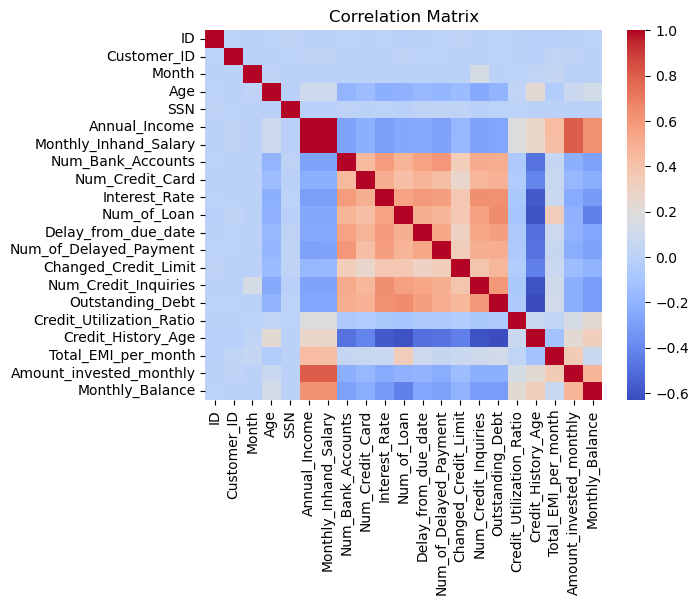

In [14]:

#correlation Analysis

correlation_analysis=df_creditdata.corr()
sns.heatmap(correlation_analysis, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

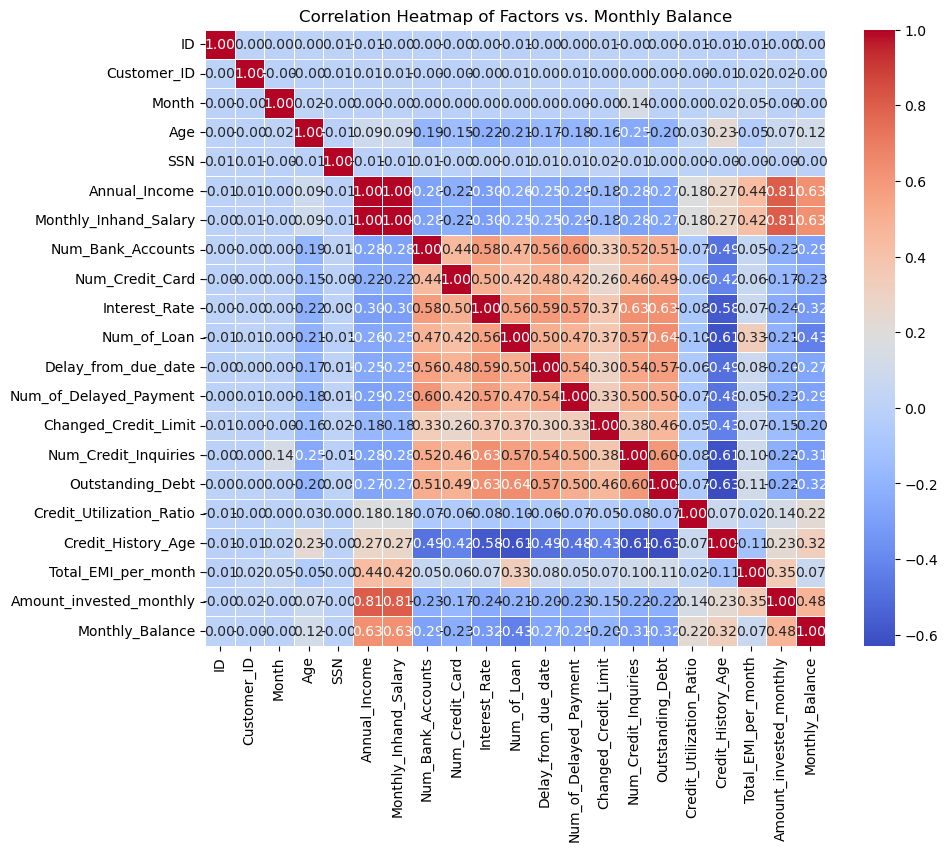

In [15]:
selected_columns = df_creditdata.select_dtypes(include=['number'])
# selected_columns = data.select_dtypes(include=['number'])


correlation_matrix = selected_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

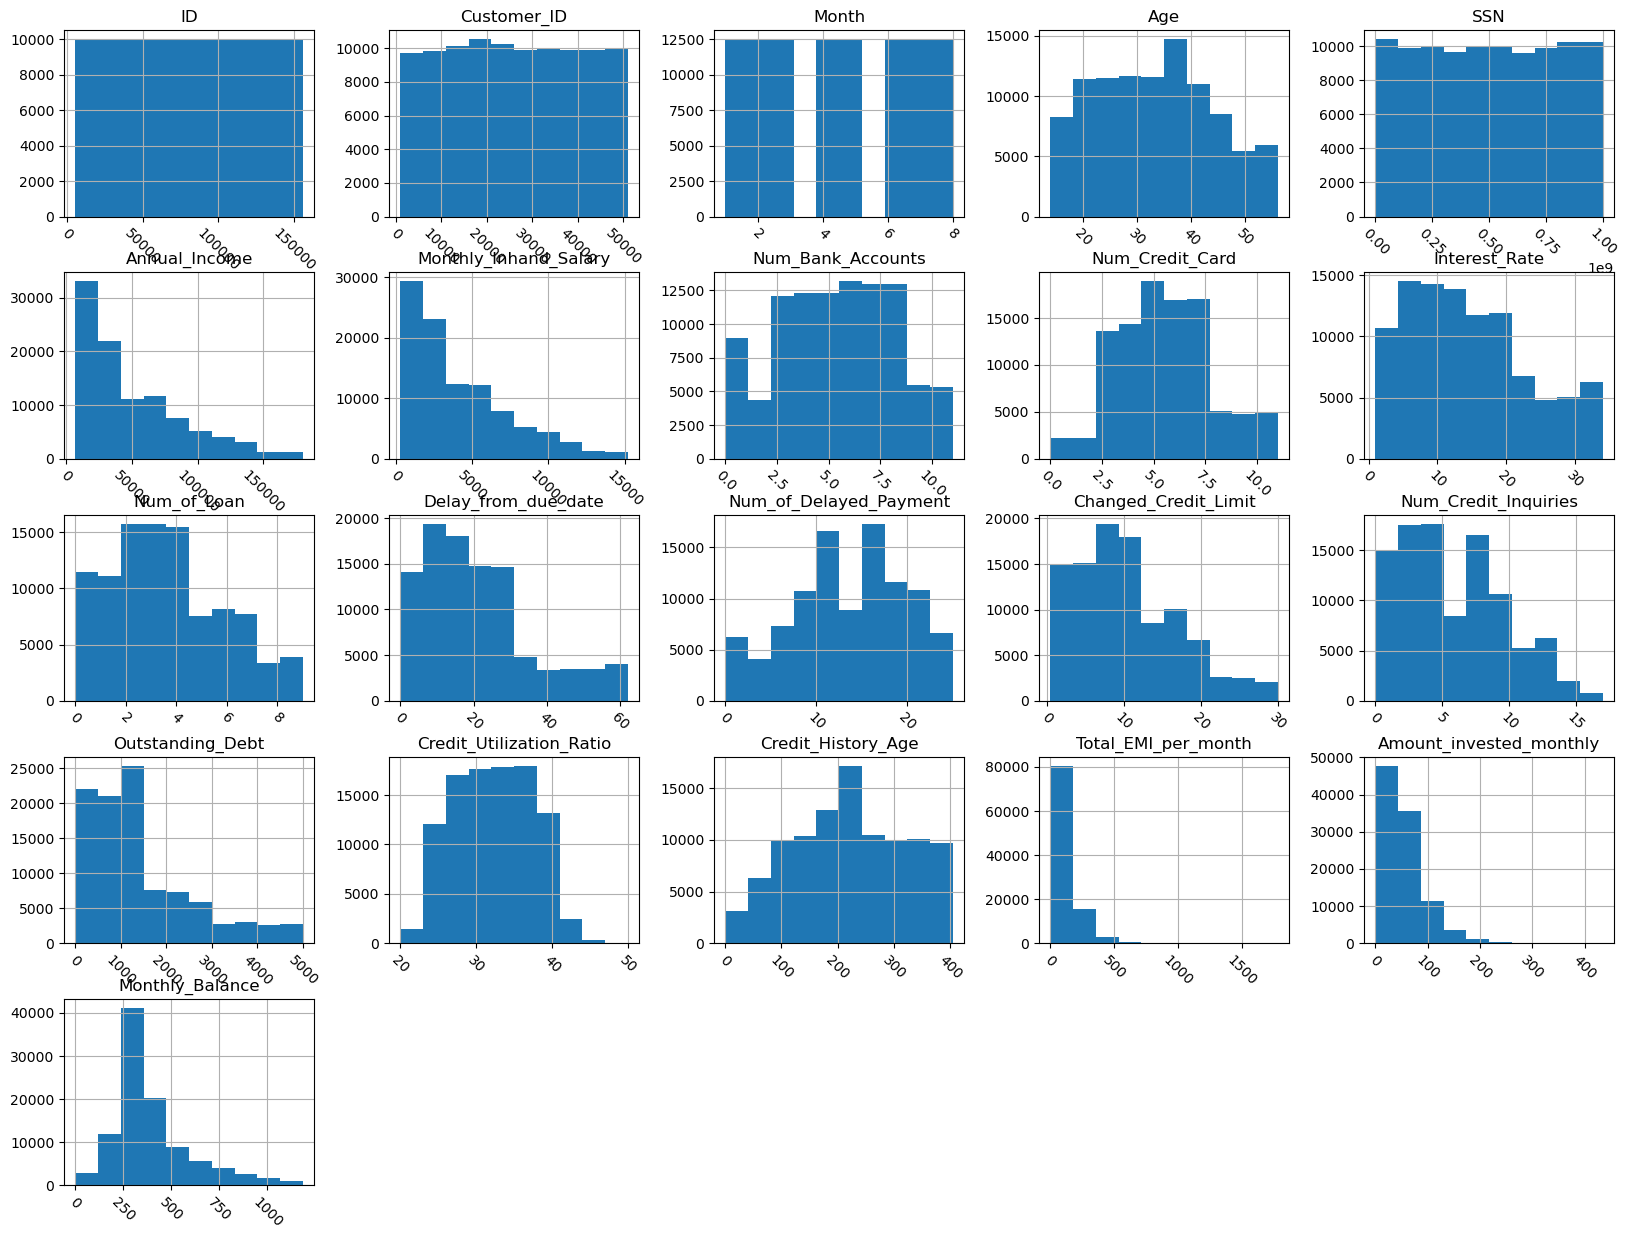

In [16]:
#Hisplot showing numerical colums
df_creditdata.hist(figsize=(20,15), xrot=-45)
plt.show()

Text(0.5, 1.0, 'Annual_Income by Age')

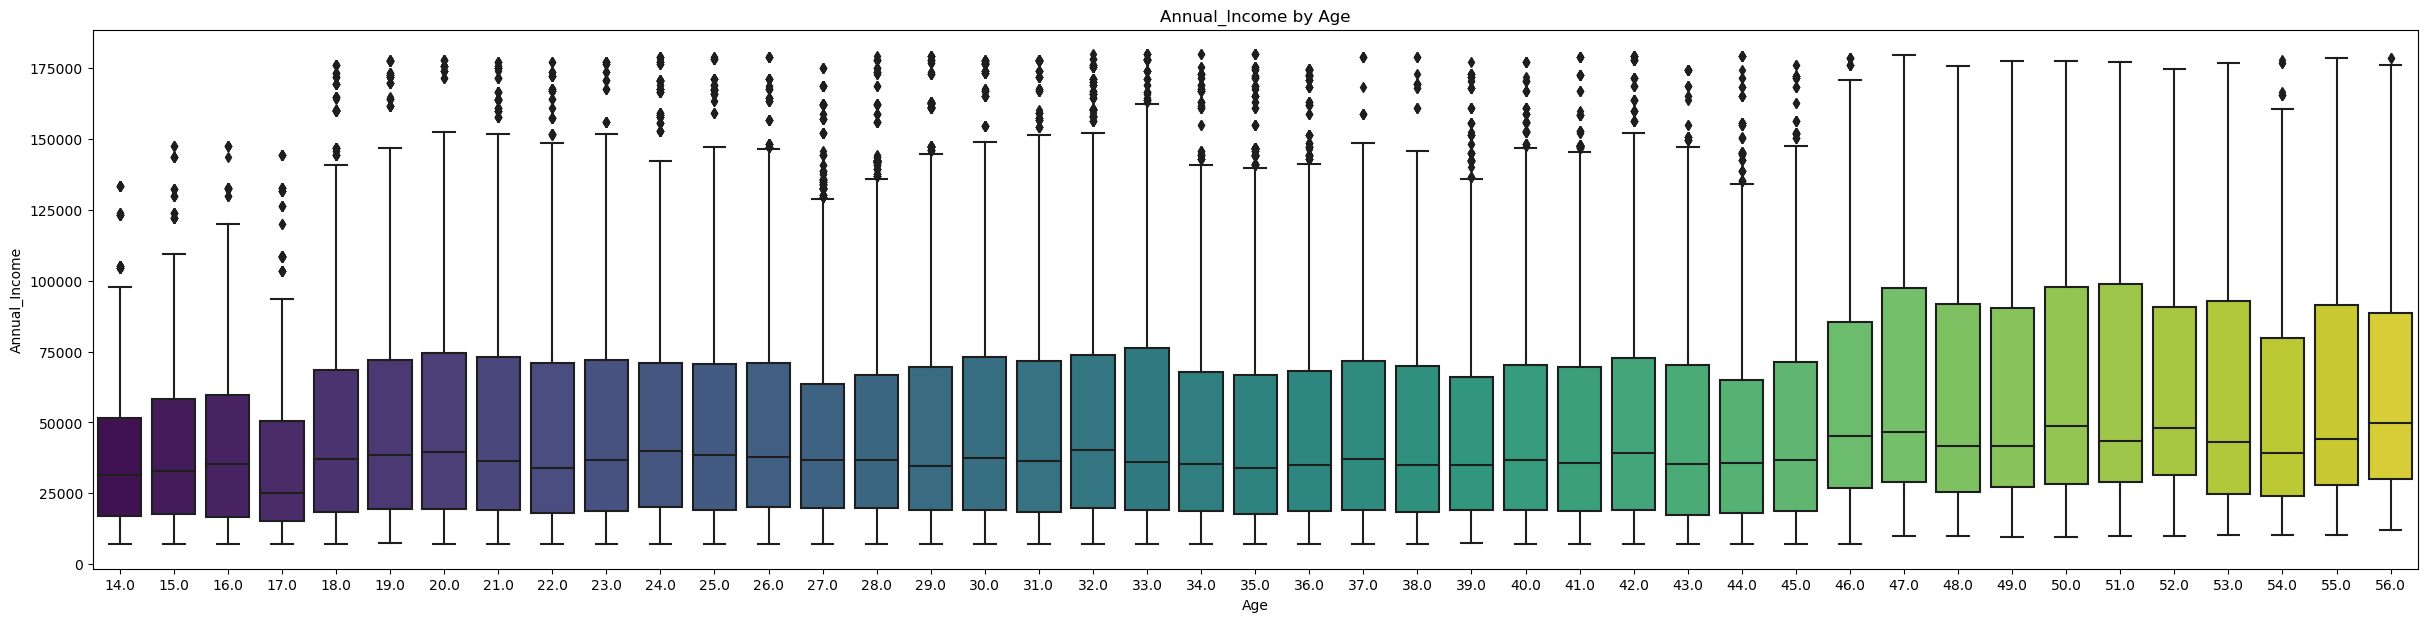

In [17]:
# Box plot showing relation between Age and Annual Income

plt.figure(figsize=(30,7))
sns.boxplot(x='Age',y='Annual_Income',data=df_creditdata,palette='viridis')
plt.title('Annual_Income by Age')


<Axes: xlabel='Age', ylabel='count'>

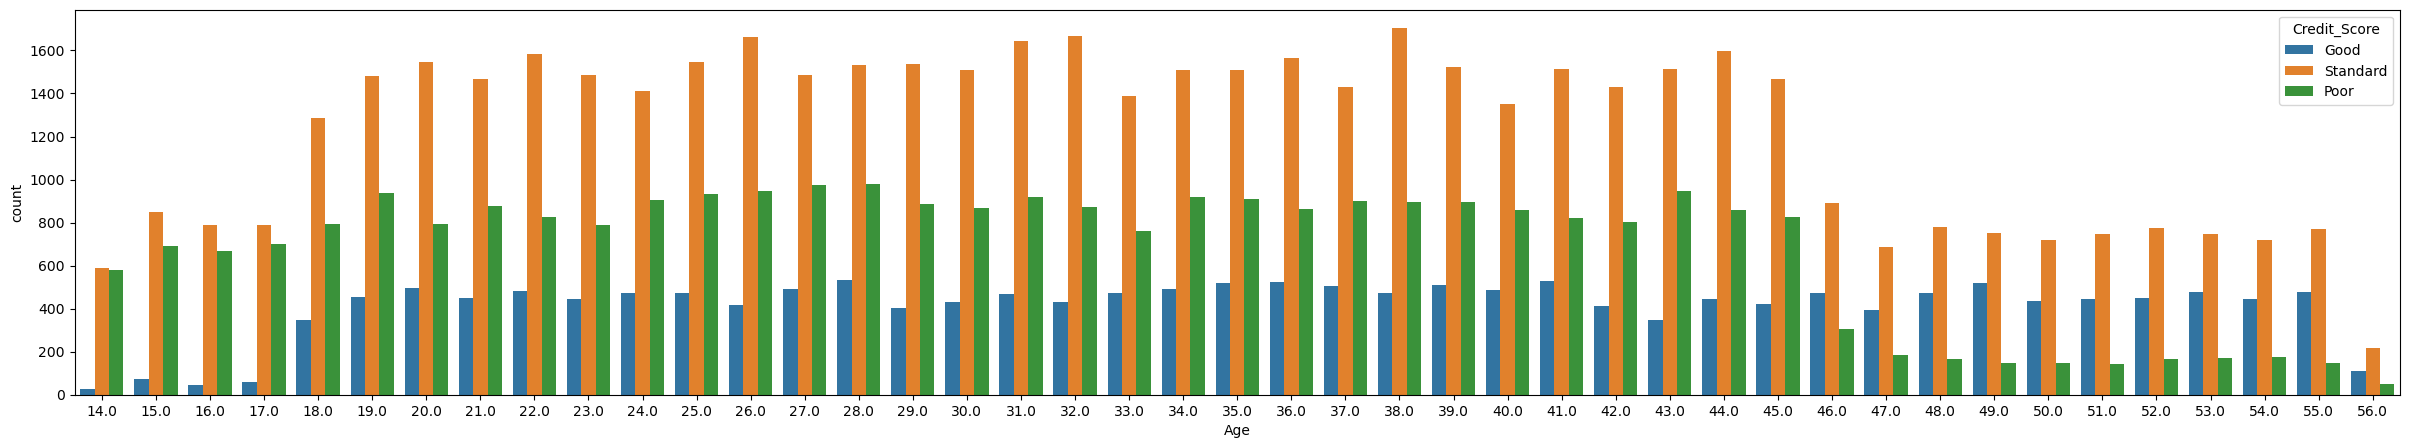

In [18]:
#Countplot with Age and Credit_score
plt.figure(figsize=(30,5))
sns.countplot(data=df_creditdata, x='Age', hue='Credit_Score')

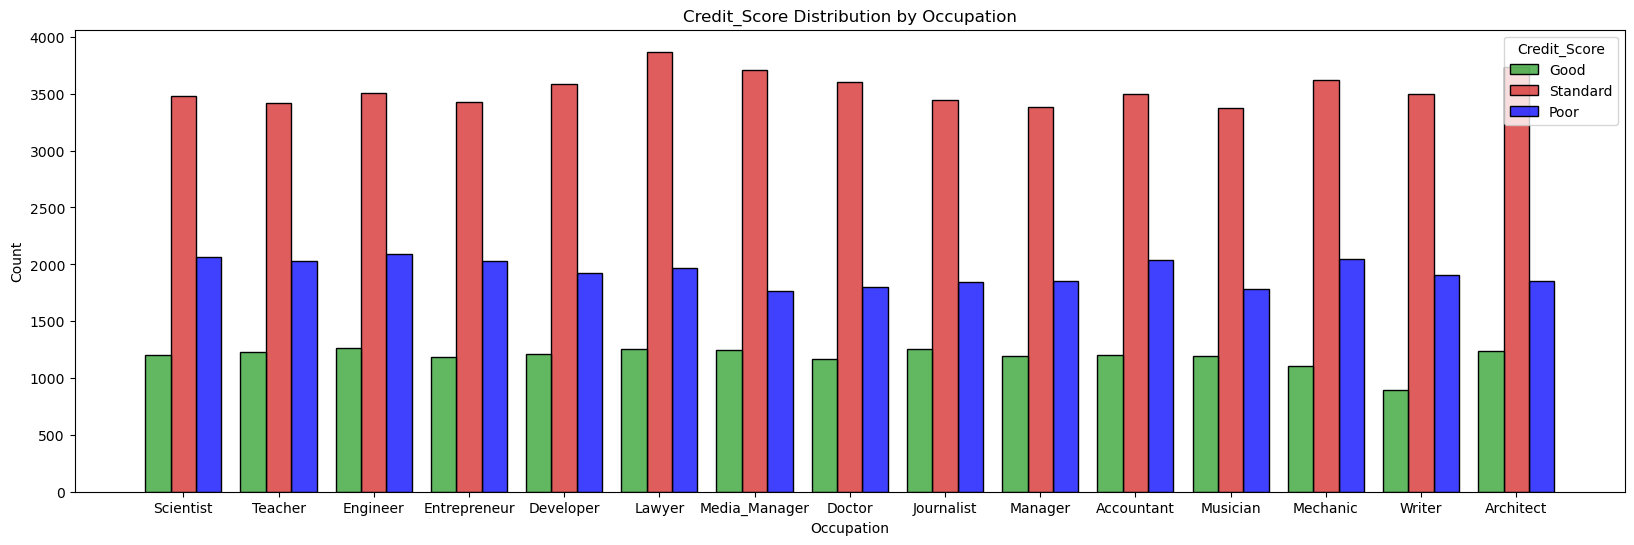

In [19]:
#Credit_Score Distribution by Occupation
colors = ["#2ca02c", "#d62728", 'blue']

# Set custom figure dimensions
plt.figure(figsize=(20, 6))

# Create the histogram plot with customized colors and dimensions
sns.histplot(data=df_creditdata, x="Occupation", hue="Credit_Score", multiple="dodge", shrink=.8, palette=colors)

# Customize other plot properties like titles, labels, etc.
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")

# Display the plot
plt.show()

Text(0.5, 1.0, 'credit_score distribution')

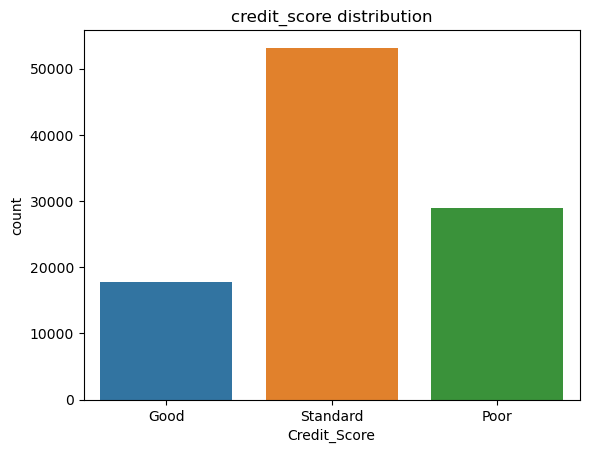

In [20]:
#count plot of categorical variable(credit_score)
sns.countplot(x='Credit_Score',data=df_creditdata)
plt.title('credit_score distribution')

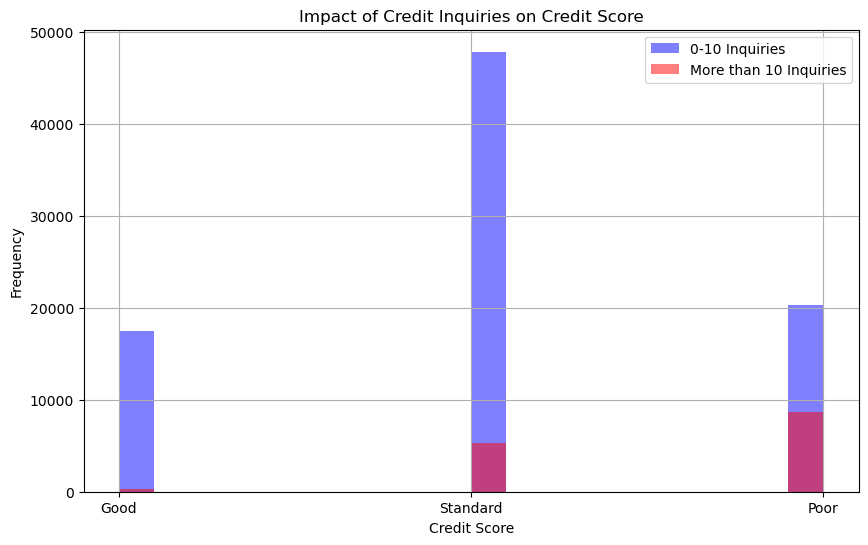

In [21]:
# Create a histogram to visualize the distribution of credit scores for different numbers of credit inquiries
plt.figure(figsize=(10, 6))
plt.hist(df_creditdata[df_creditdata['Num_Credit_Inquiries'] <= 10]['Credit_Score'], bins=20, alpha=0.5, label='0-10 Inquiries', color='blue')
plt.hist(df_creditdata[df_creditdata['Num_Credit_Inquiries'] > 10]['Credit_Score'], bins=20, alpha=0.5, label='More than 10 Inquiries', color='red')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Impact of Credit Inquiries on Credit Score')
plt.legend()
plt.grid(True)
plt.show()

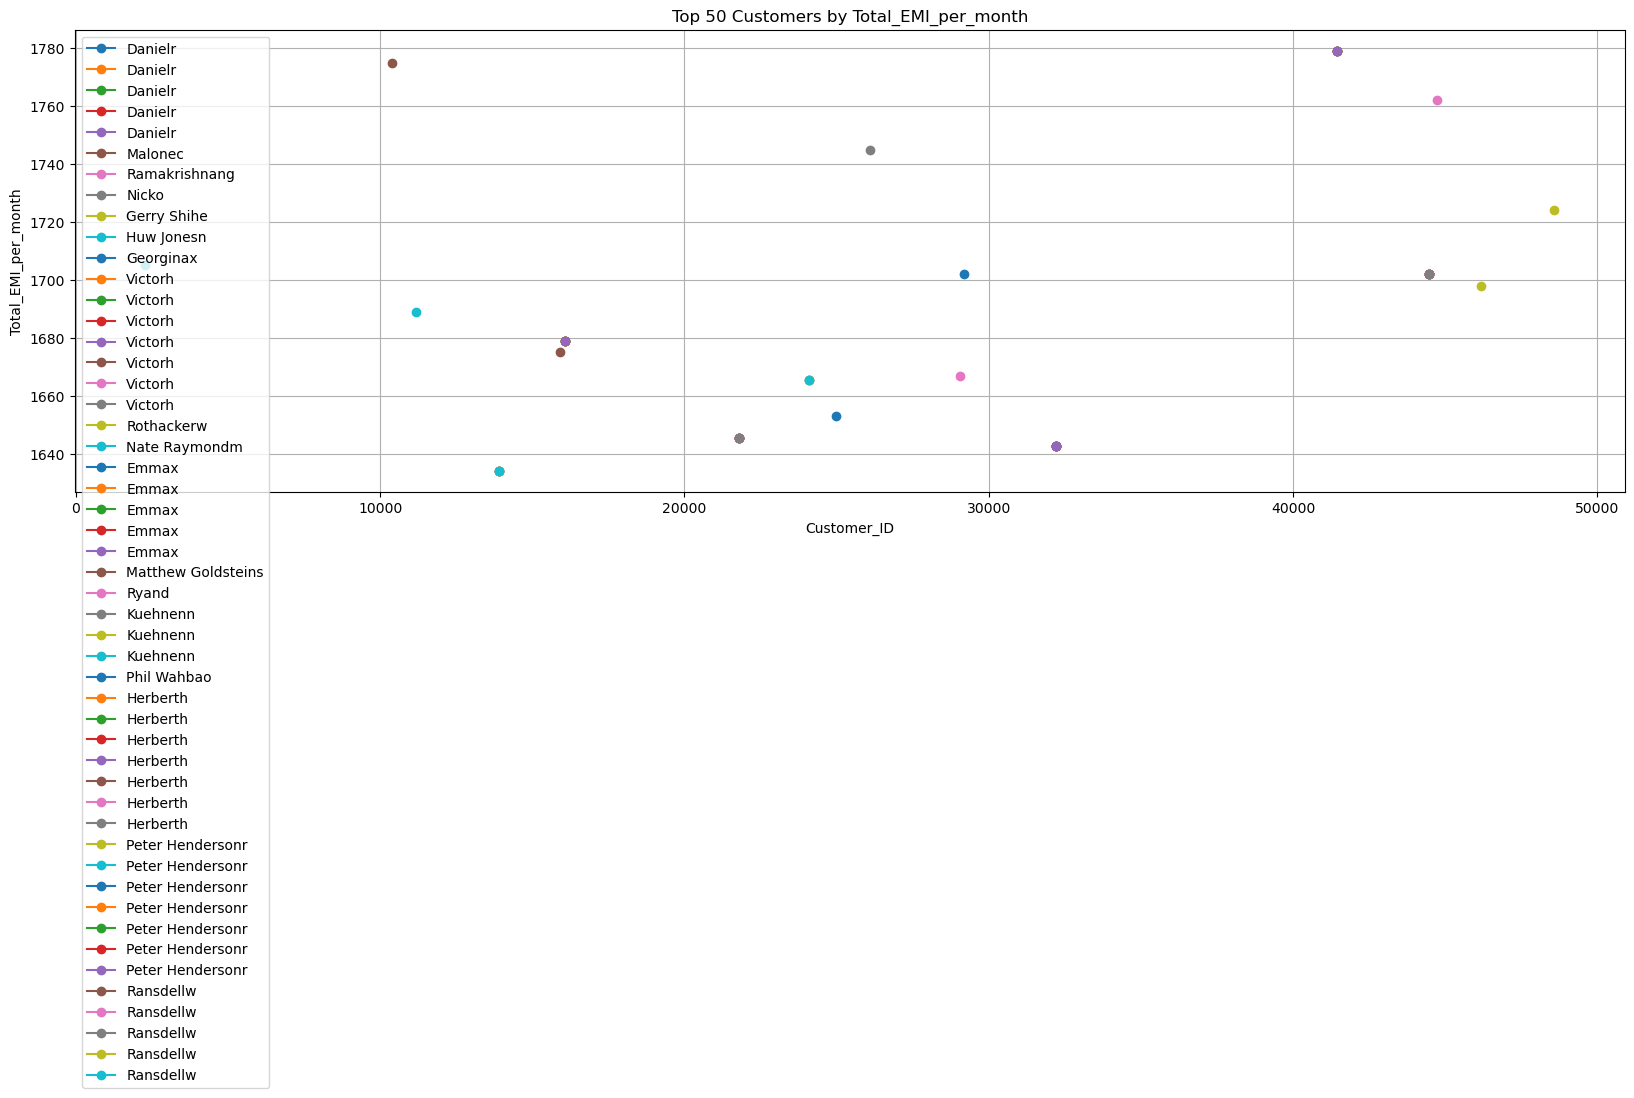

In [22]:
# Sort the dataset by Total_EMI_per_month in descending order and select top 50
top_fifty = df_creditdata.sort_values(by='Total_EMI_per_month', ascending=False).head(50)

# Create a line plot
plt.figure(figsize=(20, 6))
for index, row in top_fifty.iterrows():
    plt.plot(row['Customer_ID'], row['Total_EMI_per_month'], marker='o', label=row['Name'])

plt.xlabel('Customer_ID')
plt.ylabel('Total_EMI_per_month')
plt.title('Top 50 Customers by Total_EMI_per_month')
plt.legend()
plt.grid(True)
plt.show()



#This code snippet will create a line plot with each of the top 50 customer id with Total_EMI_per_month  represented as a line, showing how their heights have changed over the years. 
#The marker='o' argument adds a circular marker at each data point. The label argument in the plot() function adds labels to the lines, which are then displayed in the legend using the legend() function.








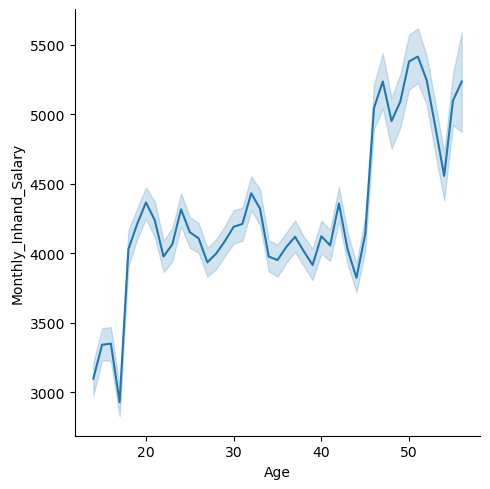

In [23]:
#Graph showing relation between Age and Monthly_Inhand_Salary
sns.relplot(x='Age',y="Monthly_Inhand_Salary",kind="line",data=df_creditdata)
plt.show()

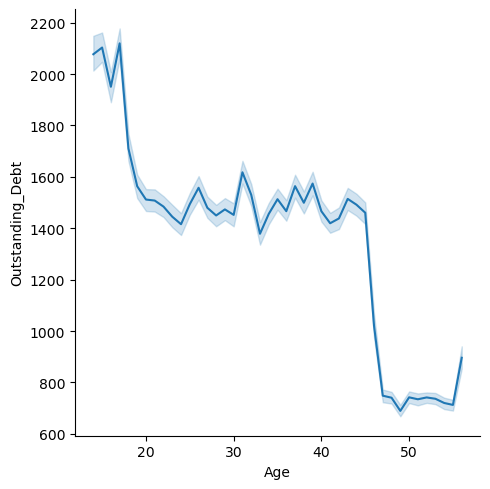

In [24]:
# plot showing relation of Age and outstanding debt
import matplotlib.pyplot as plt 

sns.relplot(x='Age',y="Outstanding_Debt",kind="line",data=df_creditdata)
plt.show()

Text(0.5, 1.0, 'Credit Scores Based on Annual Income')

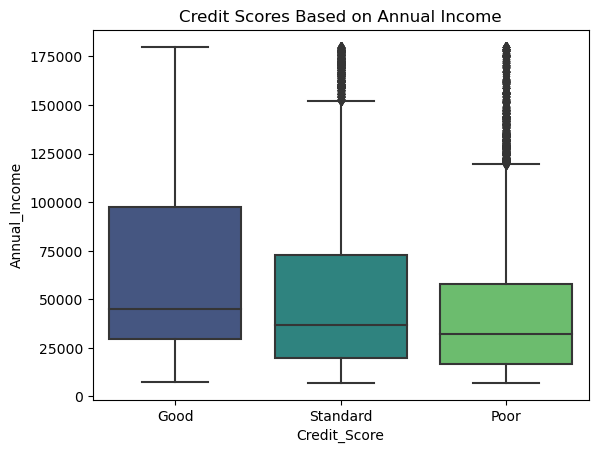

In [25]:
#box plot showing credit score and Annual income

sns.boxplot(x='Credit_Score',y='Annual_Income',data=df_creditdata,palette='viridis')
plt.title('Credit Scores Based on Annual Income')
#the more   annual income , the better credit score 

Text(0.5, 1.0, 'Credit Scores Based on Outstanding_Debt')

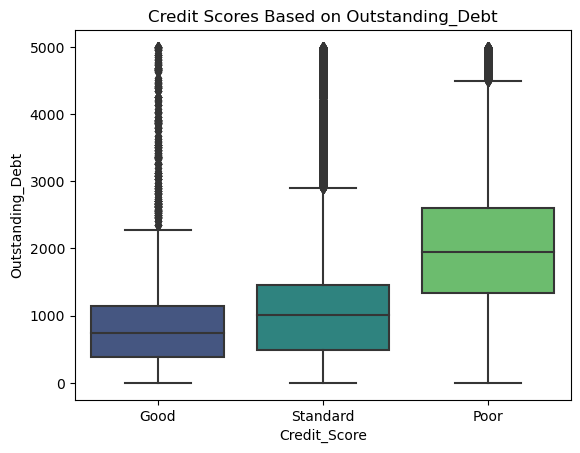

In [26]:
#boxplot showing credit score and Outstanding debt
sns.boxplot(x='Credit_Score',y='Outstanding_Debt',data=df_creditdata,palette='viridis')
plt.title('Credit Scores Based on Outstanding_Debt')

 #always having a debt of more than 1500 will affect  credit scores negatively. 

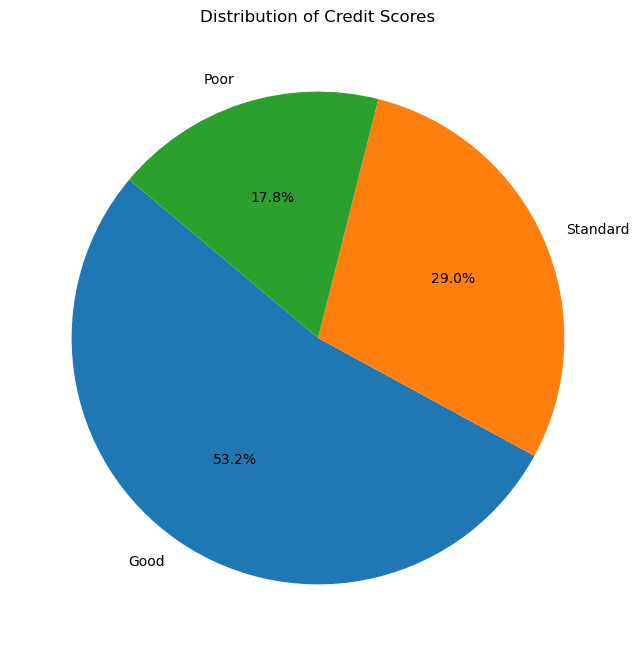

In [27]:
# Create a histogram to count the number of customers in each credit score range
plt.figure(figsize=(8, 8))
plt.pie(df_creditdata['Credit_Score'].value_counts(), labels=df_creditdata['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()



In [28]:
#Preprocessing ....Encoding ..............
#categorical column into numerical ones 

df_creditdata['Credit_Score']= LabelEncoder().fit_transform(df_creditdata['Credit_Score'])
df_creditdata['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [29]:
#encoding each category in a categorical variable by calculating the mean of the target variable-Leave-One-Out Encoding
import category_encoders as ce
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    df_creditdata[item] = ce.LeaveOneOutEncoder().fit_transform(df_creditdata[item],df_creditdata['Credit_Score'])
df_creditdata.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,0.285714,23.0,821000265.0,1.338277,19114.12,1824.843333,3.0,...,0.863016,809.98,26.822620,265.0,1.099647,49.574949,21.46538,1.355011,312.494089,0
1,5635,3392,2,0.285714,23.0,821000265.0,1.338277,19114.12,1824.843333,3.0,...,0.863016,809.98,31.944960,266.0,1.099647,49.574949,21.46538,1.358219,284.629162,0
2,5636,3392,3,0.285714,23.0,821000265.0,1.338277,19114.12,1824.843333,3.0,...,0.863016,809.98,28.609352,267.0,1.099647,49.574949,21.46538,1.337547,331.209863,0
3,5637,3392,4,0.285714,23.0,821000265.0,1.338277,19114.12,1824.843333,3.0,...,0.863016,809.98,31.377862,268.0,1.099647,49.574949,21.46538,1.385532,223.451310,0
4,5638,3392,5,0.285714,23.0,821000265.0,1.338277,19114.12,1824.843333,3.0,...,0.863016,809.98,24.797347,269.0,1.099647,49.574949,21.46538,1.342403,341.489231,0


In [30]:


df_creditdata[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]



,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1.099647,1.355011,0.285714,1.338277,0.863016
1,1.099647,1.358219,0.285714,1.338277,0.863016
2,1.099647,1.337547,0.285714,1.338277,0.863016
3,1.099647,1.385532,0.285714,1.338277,0.863016
4,1.099647,1.342403,0.285714,1.338277,0.863016
...,...,...,...,...,...
99995,1.099619,1.317284,1.285714,1.371661,0.862983
99996,1.099619,1.342352,1.285714,1.371661,0.862983
99997,1.099619,1.317284,1.285714,1.371661,0.862983
99998,1.099591,1.358033,1.142857,1.371513,0.862950


In [31]:
df_creditdata.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                        float64
Age                         float64
SSN                         float64
Occupation                  float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                

In [48]:
#Modeling
#dropping the unwanted column
df_creditdata.drop('Type_of_Loan',axis=1,inplace=True)

KeyError: "['Type_of_Loan'] not found in axis"

In [33]:
df_creditdata.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [36]:
#Feature Selection

X=df_creditdata[['Annual_Income','Age','SSN','Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly', 'Payment_Behaviour']]
X=df_creditdata.drop('Credit_Score',axis=1)
y = df_creditdata.Credit_Score



In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)



In [38]:
#training 80% and testing 20%
from sklearn.model_selection import train_test_split
#X is feature data
#y is target variable
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#create and train a support vector classfier
svc_classifier=SVC()
svc_classifier.fit(X_train,y_train)

# Create and train a K-Nearest Neighbors Classifier (KNN)
#k value is preferably odd numbers
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
# Make predictions on the test set using both classifiers
svc_predictions = svc_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)


# Evaluate the accuracy of the classifiers
svc_accuracy = accuracy_score(y_test, svc_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Support Vector Classifier Accuracy:", svc_accuracy)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

# accuracy of KNN Classfier is below
accuracy=accuracy_score(y_test, knn_predictions)*100
print('accuracy of our model is equal to '+ str(round(accuracy,2))+'%.')

#accuracy of SVC classifier is below
accuracysvc=accuracy_score(y_test, svc_predictions)*100
print('accuracy of this  model is equal to '+ str(round(accuracysvc,2))+'%.')

In [39]:
from sklearn.metrics import accuracy_score



In [40]:
#creating model
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


model=lr.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 73.42 %.


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Define RandomForestClassifier model with specified hyperparameters
model_1 = RandomForestClassifier(
    n_estimators=1000,  # Number of trees in the forest
    max_depth=90,       # Maximum depth of the trees
    random_state=1      # Random seed for reproducibility
)



# Train the model
model_1.fit(X_train, y_train)

# Make predictions on validation data


rf_predict=model_1.predict(X_test)

rf_acs=accuracy_score(y_test,rf_predict)
print(rf_acs*100)

# Print accuracy 
print("Accuracy of Random Forest:", rf_acs)

#Hyperparameter Tuning (for RandomForestClassifier)
#n_estimatos=1000
#max_depth=2



100.0
Accuracy of Random Forest: 1.0


In [51]:
from sklearn.preprocessing import MinMaxScaler


#training 80% and testing 20%
from sklearn.model_selection import train_test_split
#X is feature data
#y is target variable
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#MultinomialNB
#Hyperparameters:
#fit_prior: This parameters is like a switch for the model.When its set to True,the model will try to understand how often each class (like 'spam' or 'not spam' in email classification) appears in the training data.This helps the model make better predictions because it learns from real data.
#Now if you set it to false you're essentially telling the model not to pay attension to how often each class appears
from sklearn.naive_bayes import MultinomialNB


# Define MultinomialNB with specified hyperparameters
model_2 = MultinomialNB(
     alpha=1.0,       # Additive (Laplace/Lidstone) smoothing parameter
    fit_prior=True   # Whether to learn class prior probabilities from data
)

# Train the model
model_2.fit(X_train, y_train)

# Make predictions on validation data


mn_predict=model_2.predict(X_test)

mn_acs=accuracy_score(y_test,mn_predict)
print(mn_acs*100)

# Print accuracy 
print("Accuracy of MultinomialNB:", mn_acs)



60.61
Accuracy of MultinomialNB: 0.6061
